# **MÓDULO 32 - Random Florest**
## Avaliação e pontuação de vinhos 🍷 


### Contexto
A qualidade do vinho é um atributo complexo, influenciada por uma variedade de fatores físico-químicos. Parâmetros como acidez fixa e volátil, ácido cítrico, açúcar residual, cloretos, dióxido de enxofre (livre e total), densidade, pH, sulfatos e teor alcoólico desempenham papéis cruciais na determinação das características sensoriais que definem a qualidade de um vinho. A compreensão da relação entre essas características e a pontuação de qualidade, que varia de 0 a 10, é fundamental para produtores e consumidores.

### Objetivo Geral

Desenvolver um modelo de Random Forest para realizar a classificação multiclasse da qualidade de vinhos, utilizando as características físico-químicas disponíveis na base de dados, com o intuito de prever a pontuação de vinhos

### Base de dados

#### **Características dos Vinhos (Features)**

| Feature                   | Descrição                                                                 |
|---------------------------|--------------------------------------------------------------------------|
| Fixed Acidity            | Acidez fixa do vinho.                                                    |
| Volatile Acidity         | Acidez volátil do vinho.                                                 |
| Citric Acid              | Quantidade de ácido cítrico no vinho.                                    |
| Residual Sugar           | Açúcar residual presente no vinho.                                       |
| Chlorides                | Nível de cloretos no vinho.                                              |
| Free Sulfur Dioxide      | Dióxido de enxofre livre no vinho.                                       |
| Total Sulfur Dioxide     | Quantidade total de dióxido de enxofre no vinho.                         |
| Density                  | Densidade do vinho.                                                      |
| pH                       | Nível de pH do vinho.                                                    |
| Sulphates                | Quantidade de sulfatos no vinho.                                         |
| Alcohol                  | Teor alcoólico do vinho.                                                 |
| Quality| Pontuação do vinho baseada em dados sensoriais (escala de 0 a 10).  |



```markdown
🔍 **Observação:** 
```

### 1. Importação de Bibliotecas & AED

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import randint, uniform



from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.metrics import cohen_kappa_score, make_scorer




warnings.filterwarnings("ignore", category=FutureWarning)


# Carregando os dados
df = pd.read_csv("/home/akel/PycharmProjects/EBAC/dados/winequality-red.csv", delimiter=',')
display(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
resume=pd.DataFrame({
    'Tipo': df.dtypes,
    'Nulos': df.isnull().sum(),
    'Mínimo': df.min(),
    'Máximo': df.max()      
})
print(resume.to_markdown())

|                      | Tipo    |   Nulos |   Mínimo |    Máximo |
|:---------------------|:--------|--------:|---------:|----------:|
| fixed acidity        | float64 |       0 |  4.6     |  15.9     |
| volatile acidity     | float64 |       0 |  0.12    |   1.58    |
| citric acid          | float64 |       0 |  0       |   1       |
| residual sugar       | float64 |       0 |  0.9     |  15.5     |
| chlorides            | float64 |       0 |  0.012   |   0.611   |
| free sulfur dioxide  | float64 |       0 |  1       |  72       |
| total sulfur dioxide | float64 |       0 |  6       | 289       |
| density              | float64 |       0 |  0.99007 |   1.00369 |
| pH                   | float64 |       0 |  2.74    |   4.01    |
| sulphates            | float64 |       0 |  0.33    |   2       |
| alcohol              | float64 |       0 |  8.4     |  14.9     |
| quality              | int64   |       0 |  3       |   8       |


📌 O dataset possui, 1599 linhas e 12 colunas, das quais, 11 variáveis( *features*) para avaliar a qualidade dos vinhos são  numéricas ( do tipo  *float64*).Enquanto a variável quality ( *Target*) é numérica do tipo inteira.  Não há dados faltantes

---

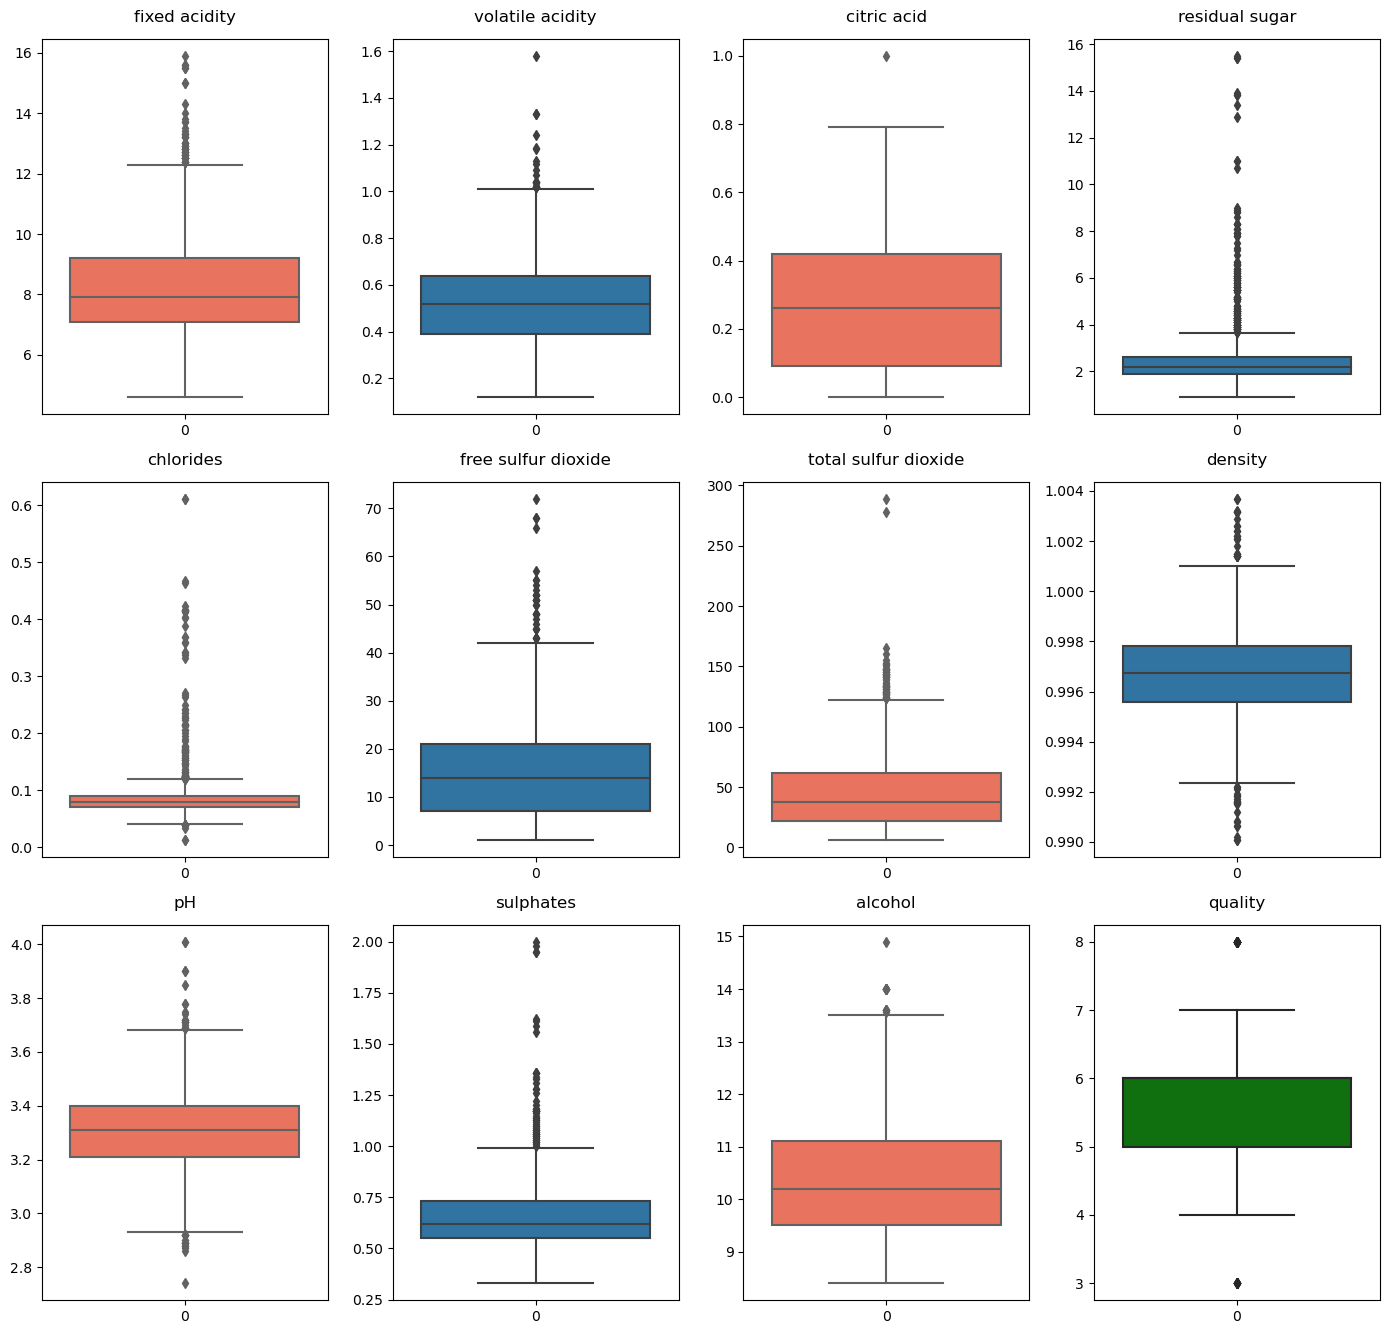

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
fig, axs = plt.subplots(3, 4, figsize=(14, 14))

sns.boxplot(data=df['fixed acidity'],color='tomato',ax=axs[0, 0])
axs[0, 0].set_title("fixed acidity", pad=12)

sns.boxplot(data=df['volatile acidity'],ax=axs[0, 1])
axs[0, 1].set_title("volatile acidity", pad=12)

sns.boxplot(data=df['citric acid'], orient='v',color='tomato',ax=axs[0, 2])
axs[0, 2].set_title("citric acid", pad=12)

sns.boxplot(data=df['residual sugar'],ax=axs[0, 3])
axs[0, 3].set_title("residual sugar", pad=12)

sns.boxplot(data=df['chlorides'],color='tomato',ax=axs[1, 0])
axs[1, 0].set_title("chlorides", pad=12)

sns.boxplot(data=df['free sulfur dioxide'],ax=axs[1, 1])
axs[1, 1].set_title("free sulfur dioxide", pad=12)

sns.boxplot(data=df['total sulfur dioxide'],color='tomato',ax=axs[1, 2])
axs[1, 2].set_title("total sulfur dioxide", pad=12)

sns.boxplot(data=df['density'],ax=axs[1, 3])
axs[1, 3].set_title("density", pad=12)

sns.boxplot(data=df['pH'],color='tomato',ax=axs[2, 0])
axs[2, 0].set_title("pH", pad=12)

sns.boxplot(data=df['sulphates'],ax=axs[2 ,1])
axs[2, 1].set_title("sulphates", pad=12)

sns.boxplot(data=df['alcohol'],color='tomato',ax=axs[2, 2])
axs[2, 2].set_title("alcohol", pad=12)

sns.boxplot(data=df['quality'],color='green',ax=axs[2,3])
axs[2, 3].set_title("quality", pad=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
df.describe()

📌 **Sobre outliers**: Com base nas informações do intervalo inquartil e dos boxplots, observamos outliers em alguma categorias. Em especial para as features *Residual Sugar*,*chlorides*, *Total Sulfur Dioxide* que apresentam valores extremos. Verificamos que os dados não seguem uma distribuição normal atráves do teste shapiro-wilk(vê anexo), o que justificou a filtragem 4.5xIQR como limiar, priorizando outliers mais extremos.


### 2.Pré-processamento dos Dados

In [4]:
# filtragem via interquartil (Limar 4.5*IQR) -- priorizar remoção de outliers extremos
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR = Q3 - Q1
df2 = df[~((df < Q1-4.5*IQR) | (df > Q3+4.5*IQR)).any(axis=1)]

percentual_removido = (1 - len(df2) / len(df)) * 100
print("\nDescribes Sem Outliers",f"(Percentual removido: {percentual_removido:.2f}%)")
display(df2.describe())


Describes Sem Outliers (Percentual removido: 6.50%)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000
mean,8.306957,0.528134,0.262415,2.332876,0.080813,15.635786,45.213378,0.996663,3.318448,0.645224,10.440301,5.638127
std,1.746361,0.180308,0.191273,0.731143,0.019599,9.949300,30.938407,0.001839,0.151964,0.138809,1.052984,0.801282
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995540,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.320000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.500000,0.089000,21.000000,60.000000,0.997800,3.410000,0.720000,11.100000,6.000000
max,15.600000,1.580000,0.790000,5.700000,0.178000,57.000000,165.000000,1.003200,4.010000,1.360000,14.000000,8.000000


📌 **Principais Mudanças Após Remoção dos Outliers:**

**Redução do desvio padrão (std)**: Em todas as variáveis, o desvio padrão diminuiu, indicando menor dispersão dos dados.
**Redução dos valores máximos:** Os valores máximos caíram significativamente, especialmente para residual sugar, chlorides, free sulfur dioxide e total sulfur dioxide, mostrando a remoção de extremos.
**Médias e medianas pouco alteradas:** As médias e medianas mudaram pouco, sugerindo que os outliers tinham pouco impacto no centro da distribuição.
**Menor amplitude:** A diferença entre o mínimo e o máximo diminuiu, tornando o conjunto de dados mais homogêneo.

Essas alterações indicam que a remoção de outliers resultou em um conjunto de dados mais consistente e menos influenciado por valores extremos, o que pode beneficiar análises estatísticas subsequentes, como testes de normalidade ou modelagem preditiva.


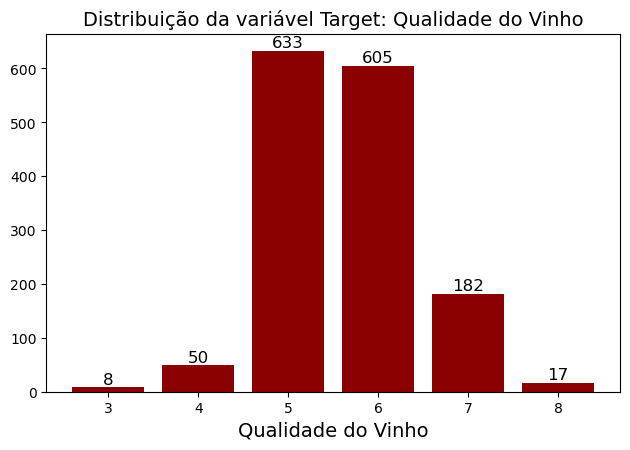

|   quality |   Contagem |   Percentual (%) |
|----------:|-----------:|-----------------:|
|         3 |          8 |             0.54 |
|         4 |         50 |             3.34 |
|         5 |        633 |            42.34 |
|         6 |        605 |            40.47 |
|         7 |        182 |            12.17 |
|         8 |         17 |             1.14 |


In [5]:
# distribuição da variável target: quality
c=df2['quality'].value_counts().sort_index() 
p= df2['quality'].value_counts(normalize=True).sort_index() * 100

plt.bar(c.index, c.values,color='darkred')
plt.title('Distribuição da variável Target: Qualidade do Vinho', fontsize=14)
plt.xlabel('Qualidade do Vinho',fontsize=14)

for i in range(len(c)):
    plt.text(c.index[i], c.values[i] , f'{c.values[i]}', ha='center', va='bottom', fontsize=12)    
plt.tight_layout(rect=[0.0, 0, 1, 0.96])
plt.show()


resumo = pd.DataFrame({
    'Contagem': c,
    'Percentual (%)': p.round(2)
})
print(resumo.to_markdown())

📌 **Balanceamento da váriavel Target:**\
 A análise da variável Target (quality) revela um desequilíbrio considerável entre qualidades de vinhos. Observamos que os vinhos de qualidade 5 e 6 dominam o conjunto de dados, representando 82,81% dos dados. Enquanto que as classes 3,4,8, são minoritárias, representando juntas apenas 5% dos conjunto de dados.


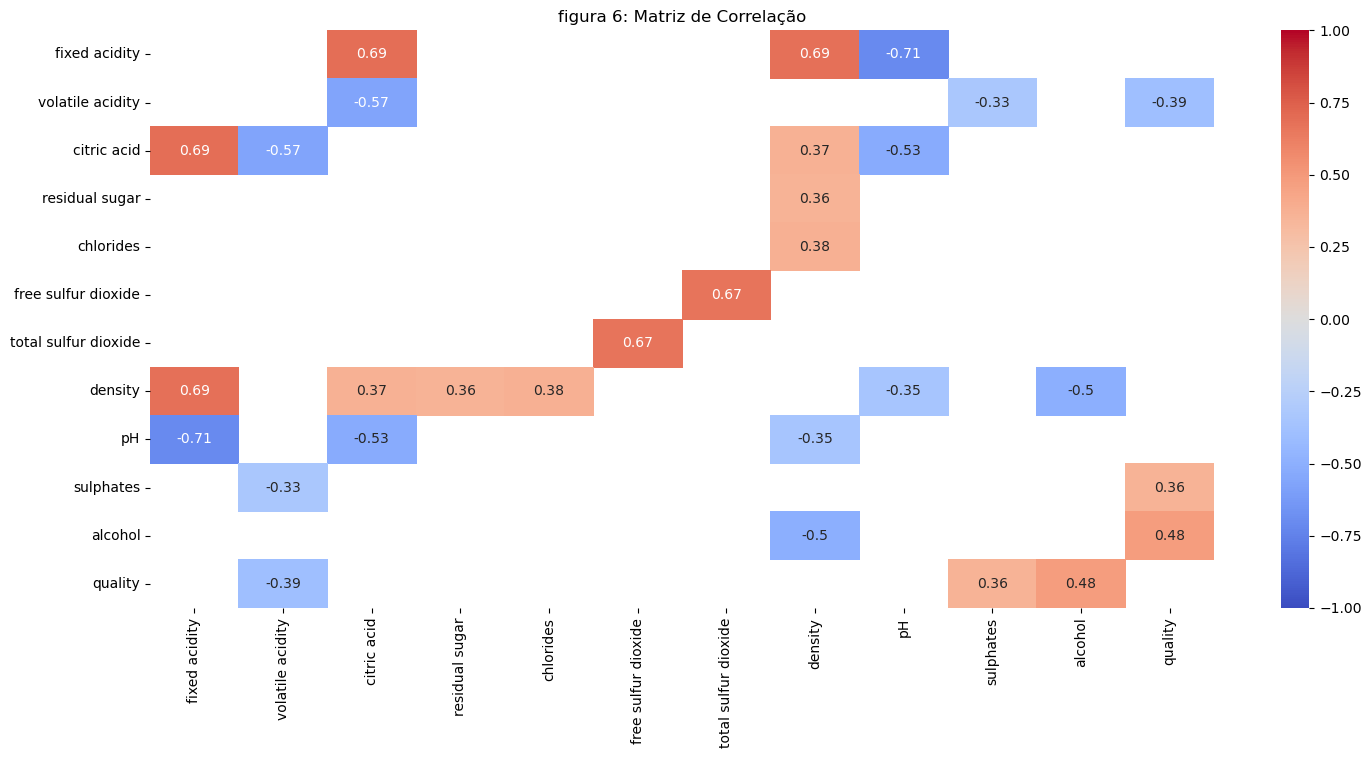

In [6]:
correlation_matrix = df2.corr()
# Exibir apenas valores >|0.15| & ignorar correlaca 1.
dfcm=correlation_matrix
dfcm[(dfcm < 0.3)&(dfcm > -0.3)] = pd.NA
dfcm[dfcm >=0.99] = pd.NA

plt.figure(figsize=(15, 8))
sns.heatmap(dfcm, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('figura 6: Matriz de Correlação')
plt.tight_layout(rect=[0.0, 0, 1, 0.96])

plt.show()

# Atribuição de novo dataframe com variaveis mais correlacionadas com a qualidade do vinho(target)
df3=df2[['alcohol','sulphates','volatile acidity','density','citric acid']]

📌 **Correlação com Qualidade do vinho:**\
Correlações "mais fortes" encontradas para qualidade do vinho foram **alcohol** (0.4804), **sulphates** (0.3613), **volatile acidity**( -0.3941). Correlações indiretas a qualidade do vinho foram encontradas nas variaves **density** e **citric acid** em suas correlações respectivas com **alcohol**(-0.5)  e **volatile acidity**(-0.57).

---

### 3. Preparação Final dos Dados
#### 3.1 Definição de features(x) e target(y)

In [7]:
# Separação da variável target e das variáveis independentes
x = df3                     # Features (variáveis independentes)
y = df2['quality']          # Target (variável dependente)

#### 3.2 Divisão Treino x Teste

In [8]:
#Separação das bases de treino e test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=33)

print(f"Base de Treino (feat):    {x_train.shape}")
print(f"Base de Treino (tag ): {y_train.shape}")
print(f"Base de Teste  (feat): {x_test.shape}")
print(f"Base de Teste  (tag ): {y_test.shape}")

print(y_test.value_counts().sort_index())


Base de Treino (feat):    (1001, 5)
Base de Treino (tag ): (1001,)
Base de Teste  (feat): (494, 5)
Base de Teste  (tag ): (494,)
quality
3      6
4     25
5    207
6    191
7     61
8      4
Name: count, dtype: int64


### 4. Modelagem Base - Random Forest
#### 4.1 Inicializacao & Treino

In [9]:
rf_model = RandomForestClassifier(random_state=33)

#treinamento dos modelos
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=33)

#### 4.2 Teste Modelo

In [10]:
# Aplicação do modelo na base de teste
y_pred = rf_model.predict(x_test)

 ### 5 - Avaliação

#### 5.1 Métrica avaliadas: Accuracy, Precision, Recall, F1 e matriz de confução



Acurácia do Modelo: 0.62
Relatório de Classificação:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        25
           5       0.65      0.77      0.71       207
           6       0.58      0.59      0.58       191
           7       0.65      0.54      0.59        61
           8       0.00      0.00      0.00         4

    accuracy                           0.62       494
   macro avg       0.31      0.32      0.31       494
weighted avg       0.58      0.62      0.59       494

Matriz de Confusão:
[[  0   0   4   2   0   0]
 [  0   0  17   8   0   0]
 [  0   0 160  46   1   0]
 [  0   0  63 113  15   0]
 [  0   0   2  25  33   1]
 [  0   0   0   2   2   0]]


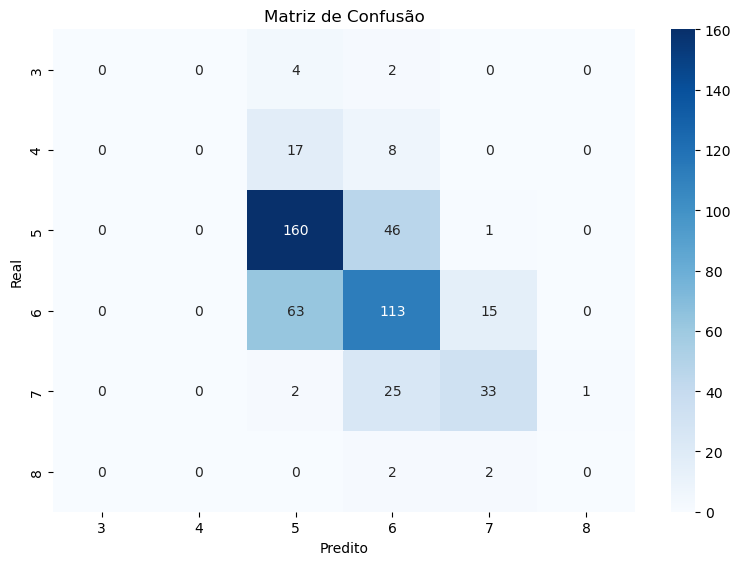

In [11]:
# Avaliação do modelo

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,zero_division=0)
print("="*60)

print(f"Acurácia do Modelo: {accuracy:.2f}")
print("Relatório de Classificação:")
print(classification_rep)
print("="*60)
print("Matriz de Confusão:")
print(conf_matrix)

# Visualização da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.tight_layout(rect=[0.0, 0, 1, 0.96])
plt.show()

#### 📌 5.2  Comentários e Insights


**Acurácia do modelo (0.62)**: Indica que o modelo acerta 62%, sem discriminar as categorias/qualidade dos vinhos. Porém estamos ciêntes do desbalanceamento dos dados e  que o resultado é favorecido pela categorias majoritárias.

**Média macro (0.31):**  Encontramos o mesmo valor para *precision, recall e F-score*, que denota um forte indicador para um desempenho ruim para classes minoritárias.

**Média Ponderada(0.58,0.62,0.60)** Os valores encontrados para *precision, recall e F-score* já ponderam o número das amostras, o que faz que o bom desempenho das classes majoritárias (5 e 6) se aproximente da acurácia geral do modelo. Apesar do modelo ser eficaz na maior parte dos dados, não consegue a mesma performancer nas categorias minoritáias.

**Matriz de confusão**\
A maior parte dos acertos (valores na diagonal) está nas qualidades 5 (118) e 6 (89). Isso confirma o bom desempenho nas classes majoritárias. Para as qualidades 3, 4 e 8, os valores na diagonal principal são zero. dito de outra forma, o modelo nunca previu corretamente um vinho dessas qualidades! Por exemplo, vinho de qualidade 3 foi classificado como 5. Além disso, existe uma confusão entre qualidades adjacentes (e.g., vinhos de qualidade 5 confundidos com 6, e vinhos de qualidade 6 confundidos com 5). isso  pode ser um sinal de que os limites entre as qualidades são sutis para o modelo sem um balanceamento.

Portanto, a dificuldade do modelo em prever as classes 3, 4 e 8 pode está diretamente relacionada ao desbalanceamento dos dados. Classes com poucos exemplos acabam sendo ignoradas ou preditas como as classes mais comuns, prejudicando o desempenho nessas categorias. Balancear os dados, pode ser um passo inicial para o melhor desempenho.


### 6. Otimização de Hiperparâmetros – Randomized Search
#### 6.1 Grid de busca


In [12]:
param_grid = {
    'n_estimators': [200,400,1000],
    'max_depth': [None,10,20,40,80],
    'min_samples_split': randint(2,11),
    'min_samples_leaf': randint(1,6),
    'class_weight': ['balanced', 'balanced_subsample', None],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap'   : [True, False],
    'criterion'   : ["gini", "entropy", "log_loss"]
}


#### 6.2 Random Search
#### Exemplo 1: Estimativa sem balanceamento


In [13]:
kappa_scorer = make_scorer(cohen_kappa_score)


random_search_a = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=100, 
    cv=10, 
    n_jobs=-1,
    verbose=0, 
    random_state=33, 
    scoring=kappa_scorer)

random_search_a.fit(x_train, y_train)
random_search_a.best_estimator_

print(f"Melhores Hiperparâmetros: {random_search_a.best_params_}")


/home/akel/anaconda3/envs/data_science_np2/lib/python3.9/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


Melhores Hiperparâmetros: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


#### Exemplo 2: Base de treino balanceadas

In [14]:
# Balannceamento da base de treino

# smote = SMOTE(random_state=33,k_neighbors=1)
# x_train_b, y_train_b = smote.fit_resample(x_train, y_train)


# random_search_b = RandomizedSearchCV(
#     estimator=rf_model,
#     param_distributions=param_grid,
#     n_iter=100, 
#     cv=10, 
#     n_jobs=-1,
#     verbose=0, 
#     random_state=33, 
#     scoring='f1_macro')

# random_search_b.fit(x_train_b, y_train_b)
# random_search_b.best_estimator_
# print(f"Melhores Hiperparâmetros: {random_search_b.best_params_}")

ros= RandomOverSampler(random_state=33)
x_train_b, y_train_b = ros.fit_resample(x_train, y_train)


random_search_b = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=100, 
    cv=10, 
    n_jobs=-1,
    verbose=0, 
    random_state=33, 
    scoring=kappa_scorer)

random_search_b.fit(x_train_b, y_train_b)
random_search_b.best_estimator_
print(f"Melhores Hiperparâmetros: {random_search_b.best_params_}")





Melhores Hiperparâmetros: {'bootstrap': False, 'class_weight': 'balanced_subsample', 'criterion': 'log_loss', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 400}


#### 6.3 Avaliação do Modelo com Hiperparâmetros Otimizados

Acurácia do Modelo: 0.66
Relatório de Classificação:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        25
           5       0.69      0.82      0.75       207
           6       0.61      0.65      0.63       191
           7       0.71      0.52      0.60        61
           8       0.00      0.00      0.00         4

    accuracy                           0.66       494
   macro avg       0.34      0.33      0.33       494
weighted avg       0.61      0.66      0.63       494

[[  0   0   5   1   0   0]
 [  0   0  15  10   0   0]
 [  0   0 169  36   2   0]
 [  0   0  56 124  11   0]
 [  0   0   0  28  32   1]
 [  0   0   0   4   0   0]]


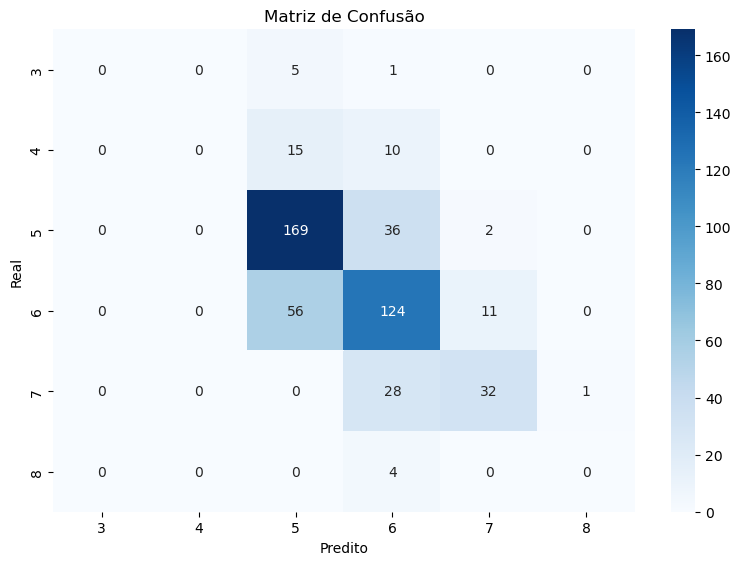

In [15]:
best_rf_model = random_search_a.best_estimator_


best_rf_model.fit(x_train, y_train)
y_pred2 = best_rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)
classification_rep = classification_report(y_test, y_pred2,zero_division=0)
print("="*60)

print(f"Acurácia do Modelo: {accuracy:.2f}")
print("Relatório de Classificação:")
print(classification_rep)
print("="*60)
print(conf_matrix)
# Visualização da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.tight_layout(rect=[0.0, 0, 1, 0.96])
plt.show()

Acurácia do Modelo: 0.62
Relatório de Classificação:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        25
           5       0.67      0.78      0.72       207
           6       0.58      0.58      0.58       191
           7       0.62      0.57      0.60        61
           8       0.00      0.00      0.00         4

    accuracy                           0.62       494
   macro avg       0.31      0.32      0.32       494
weighted avg       0.58      0.62      0.60       494

[[  0   0   5   1   0   0]
 [  0   0  16   9   0   0]
 [  0   0 161  43   3   0]
 [  0   2  59 111  17   2]
 [  0   1   1  23  35   1]
 [  0   0   0   3   1   0]]


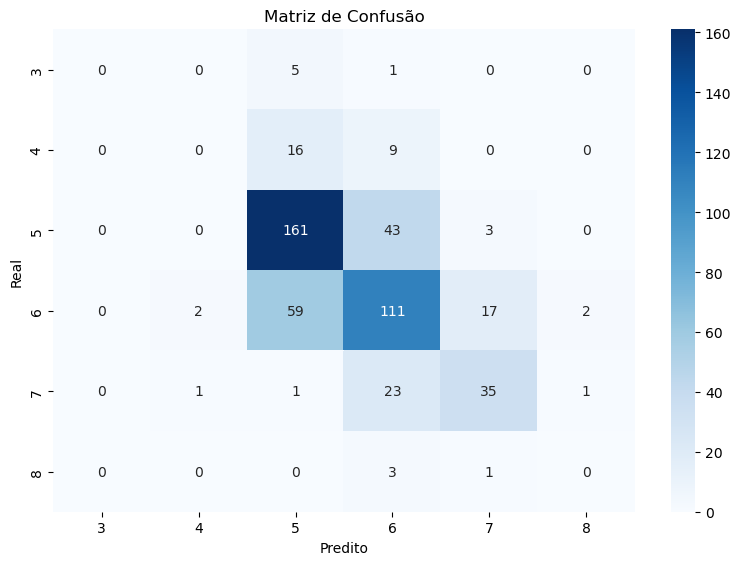

In [16]:
best_rf_model = random_search_b.best_estimator_


best_rf_model.fit(x_train_b, y_train_b)
y_pred3 = best_rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred3)
conf_matrix = confusion_matrix(y_test, y_pred3)
classification_rep = classification_report(y_test, y_pred3,zero_division=0)
print("="*60)

print(f"Acurácia do Modelo: {accuracy:.2f}")
print("Relatório de Classificação:")
print(classification_rep)
print("="*60)
print(conf_matrix)
# Visualização da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.tight_layout(rect=[0.0, 0, 1, 0.96])
plt.show()

### 7. Próximos Passos e Aperfeiçoamento (Bônus)


In [17]:
df = pd.read_csv("winequality-red.csv", delimiter=',')

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Esta abordagem permitirá que vocês explorem como diferentes características químicas influenciam a qualidade dos vinhos e como o Random Forest pode ser usado para fazer previsões precisas com base nesses dados.

# Anexo - Teste Estatistico

In [18]:
# TESTE ESTATISTICO Kolmogorov-Smirnov
from scipy.stats import kstest,shapiro
from scipy.stats import skew, kurtosis


def teste_KS(dados):
    '''
    Hipotese nula Ho:     '''
    ks_statistic, p_valor = kstest(dados, 'norm', args=(np.mean(dados), np.std(dados)))
   # ks_statistic, p_valor = kstest(dados, 'expon') #, args=(np.mean(dados), np.std(dados)))
    assimetria = skew(dados)
    curtose = kurtosis(dados)

    print(f"Assimetria : {assimetria }")
    print(f"Curtose: {curtose}")
    print(f"Estatística KS: {ks_statistic}")
    print(f"Valor p: {p_valor}")

   
    alpha = 0.05  # Nível de significância de 5%
    if p_valor < alpha:
        print("Rejeitamos a hipótese nula: os dados NÃO seguem uma distribuição normal.")
    else:
        print("Não rejeitamos a hipótese nula: os dados seguem uma distribuição normal.")
    print('-' * 70)


def teste_SW(dados):
    '''
    Teste de Shapiro-Wilk para normalidade
    
    Hipótese nula (H0): Os dados seguem uma distribuição normal.
    '''
    # Calcula estatísticas descritivas
    assimetria = skew(dados)
    curtose = kurtosis(dados)
    
    # Executa o teste de Shapiro-Wilk
    sw_statistic, p_valor = shapiro(dados)
    
    # Exibe os resultados
    print(f"Assimetria: {assimetria:.4f}")
    print(f"Curtose: {curtose:.4f}")
    print(f"Estatística SW: {sw_statistic:.4f}")
    print(f"Valor-p: {p_valor:.4f}")
    
    # Interpretação do resultado
    alpha = 0.05
    if p_valor < alpha:
        print("Rejeitamos H0: os dados NÃO seguem distribuição normal (p < 0.05)")
    else:
        print("Não rejeitamos H0: os dados seguem distribuição normal (p ≥ 0.05)")
    print('-' * 70)    
   
#print('-' * 15+'fixed acidity'+'-' * 15)
#teste_SW(df['fixed acidity'])
#teste_KS(df['fixed acidity'])
for i in df2.columns:
    print('-' * 10 + i + '-' * 10)
    #teste_KS(df[i])
    teste_SW(df[i])
  


----------fixed acidity----------
Assimetria: 0.9818
Curtose: 1.1249
Estatística SW: 0.9420
Valor-p: 0.0000
Rejeitamos H0: os dados NÃO seguem distribuição normal (p < 0.05)
----------------------------------------------------------------------
----------volatile acidity----------
Assimetria: 0.6710
Curtose: 1.2180
Estatística SW: 0.9743
Valor-p: 0.0000
Rejeitamos H0: os dados NÃO seguem distribuição normal (p < 0.05)
----------------------------------------------------------------------
----------citric acid----------
Assimetria: 0.3180
Curtose: -0.7903
Estatística SW: 0.9553
Valor-p: 0.0000
Rejeitamos H0: os dados NÃO seguem distribuição normal (p < 0.05)
----------------------------------------------------------------------
----------residual sugar----------
Assimetria: 4.5364
Curtose: 28.5244
Estatística SW: 0.5661
Valor-p: 0.0000
Rejeitamos H0: os dados NÃO seguem distribuição normal (p < 0.05)
----------------------------------------------------------------------
----------chlori

In [19]:
import pandas as pd
from scipy.stats import pearsonr


var1 = df2['fixed acidity']
var2 = df2['quality']

# 3. Calcular a Correlação de Pearson e o p-valor
# A função pearsonr retorna uma tupla: (coeficiente_de_correlacao, p_valor)
correlation_coefficient, p_value = pearsonr(var1, var2)

print(f"Correlação de Pearson entre 'alcohol' e 'quality': {correlation_coefficient:.4f}")
print(f"P-valor correspondente: {p_value:.4f}")

# 4. Avaliar a significância estatística
# Define um nível de significância (alfa). O mais comum é 0.05.
alpha = 0.05

print(f"\nNível de significância (alpha): {alpha}")

if p_value < alpha:
    print(f"Como o p-valor ({p_value:.4f}) é menor que alpha ({alpha}),")
    print("Rejeitamos a hipótese nula. A correlação é estatisticamente significativa.")
else:
    print(f"Como o p-valor ({p_value:.4f}) é maior ou igual a alpha ({alpha}),")
    print("Não rejeitamos a hipótese nula. A correlação NÃO é estatisticamente significativa.")



Correlação de Pearson entre 'alcohol' e 'quality': 0.1195
P-valor correspondente: 0.0000

Nível de significância (alpha): 0.05
Como o p-valor (0.0000) é menor que alpha (0.05),
Rejeitamos a hipótese nula. A correlação é estatisticamente significativa.
